In [2]:
#pip install keras

In [3]:
#pip install tensorflow

In [6]:
#pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [7]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
scaler = joblib.load('credit_scaler.pkl')
#model = pickle.load(open('credit_model.pkl','rb'))
pickle_in = open('credit_model.pkl', 'rb')
model = pickle.load(pickle_in)



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10752     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 192)               49344     
                                                                 
 batch_normalization_1 (Bat  (None, 192)               768       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 192)               0

In [12]:
# Transform Input columns
def transform_resp(resp):
    def yes_no(column):
        if resp[column] == 'Yes':
            return 1
        else:
            return 0
# LOANS TYPES
    loans = {
        'Credit-Builder Loan': 0,
        'Personal Loan': 0,
        'Debt Consolidation Loan': 0,
        'Student Loan': 0,
        'Payday Loan': 0,
        'Mortgage Loan': 0,
        'Auto Loan': 0,
        'Home Equity Loan': 0
    }

    if resp['loans'] == None:
        loans['Credit-Builder Loan'] = 0
        loans['Personal Loan'] = 0
        loans['Debt Consolidation Loan'] = 0
        loans['Student Loan'] = 0
        loans['Payday Loan'] = 0
        loans['Mortgage Loan'] = 0
        loans['Auto Loan'] = 0
        loans['Home Equity Loan'] = 0
    else:
        for key_ans in loans.keys():
            if key_ans in resp['loans']:
                loans[key_ans] = 1



# OCCUPATION:
    occupation = {
        'Architect': None,
        'Developer' : None,
        'Doctor': None,
        'Engineer': None,
        'Entrepreneur': None,
        'Journalist': None,
        'Lawyer': None,
        'Manager': None,
        'Mechanic': None,
        'Media_Manager': None,
        'Musician': None,
        'Scientist': None,
        'Teacher': None,
        'Writer': None
    }

    if resp['occupation'] == None:
        occupation['Architect'] = None
        occupation['Developer'] = None
        occupation['Doctor'] = None
        occupation['Engineer'] = None
        occupation['Entrepreneur'] = None
        occupation['Journalist'] = None
        occupation['Lawyer'] = None
        occupation['Manager'] = None
        occupation['Mechanic'] = None
        occupation['Media_Manager'] = None
        occupation['Musician'] = None
        occupation['Scientist'] = None
        occupation['Teacher'] = None
        occupation['Writer'] = None
    else:
        for key_ans in occupation.keys():
            if key_ans in resp['occupation']:
                occupation[key_ans] = 1

# COLUMNS
    output = {
        'Age': resp['age'],
        'Annual_Income': resp['annual_income'],
        'Monthly_Inhand_Salary':resp['monthly_inhand_salary'],
        'Num_Bank_Accounts': resp['accounts'],
        'Num_Credit_Card': resp['credit_cards'],
        'Interest_Rate': resp['changed_credit_limit'],
        'Num_of_Loan': resp['noof_loans'],
        'Delay_from_due_date': resp['delay_from_due_date'],
        'Num_of_Delayed_Payment': resp['delayed_payments'],
        'Changed_Credit_Limit': resp['changed_credit_limit'],
        'Num_Credit_Inquiries': resp['num_credit_inquiries'],
        'Credit_Mix': resp['credit_mix'],
        'Outstanding_Debt': resp['outstanding_debt'],
        'Credit_Utilization_Ratio': resp['credit_card_ratio'],
        'Credit_History_Age': resp['credit_history'],
        'Total_EMI_per_month': resp['emi_monthly'],
        'Amount_invested_monthly': resp['amount_invested_monthly'],
        'Monthly_Balance': resp['monthly_balance'],
        'Credit-Builder_Loan': loans['Credit-Builder Loan'],
        'Personal Loan': loans['Personal Loan'],
        'Debt Consolidation Loan': loans['Debt Consolidation Loan'],
        'Student Loan': loans['Student Loan'],
        'Payday Loan': loans['Payday Loan'],
        'Mortgage Loan': loans['Mortgage Loan'],
        'Auto Loan': loans['Auto Loan'],
        'Home Equity Loan': loans['Home Equity Loan'],
        'Occupation_Architect': occupation['Architect'],
        'Occupation_Developer': occupation['Developer'],
        'Occupation_Doctor': occupation['Doctor'],
        'Occupation_Engineer': occupation['Engineer'],
        'Occupation_Entrepreneur': occupation['Entrepreneur'],
        'Occupation_Journalist': occupation['Journalist'],
        'Occupation_Lawyer': occupation['Lawyer'],
        'Occupation_Manager': occupation['Manager'],
        'Occupation_Mechanic': occupation['Mechanic'],
        'Occupation_Media_Manager': occupation['Media_Manager'],
        'Occupation_Musician': occupation['Musician'],
        'Occupation_Scientist': occupation['Scientist'],
        'Occupation_Teacher': occupation['Teacher'],
        'Occupation_Writer': occupation['Writer'],
        'Payment_of_Min_Amount_Yes': yes_no('minimum_payment'),

    }

    return output

In [13]:
st.set_page_config(page_title='Credit Score App', page_icon='💰', layout='wide',
                   initial_sidebar_state='auto', menu_items={
                        'Get Help': None,
                          })



In [14]:
# Defining Default values
age_default = None
annual_income_default = 0.00
monthly_inhand_salary_default = 0.00
accounts_default = 0
credit_cards_default = 0
interest_rate_default = 0
noof_loans_default = 0
delay_from_due_date_default = 0
delayed_payments_default = 0
changed_credit_limit_default = 0
num_credit_inquiries_default = 0
credit_mix_default = 0.00
outstanding_debt_default = 0.00
credit_card_ratio_default = 0.00
emi_monthly_default = 0.00
amount_invested_monthly_default = 0.00
monthly_balance_default = 0.00
credit_history_default = 0
loans_default = None
missed_payment_default = 0
minimum_payment_default = 0
payment_behaviour_default = None
month_default = None

In [15]:
st.title('Credit Score Analysis')


2023-10-08 13:05:45.983 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [16]:
# Input Values
with st.sidebar:
    st.header('Credit Score Prediction Form')
    age = st.slider('What is your age?', min_value=18, max_value=100, step=1, value=age_default)
    annual_income = st.number_input('What is your Annual Income?', min_value=0.00, max_value=300000.00, value=annual_income_default)
    monthly_inhand_salary = st.number_input('What is your monthly Inhand Salary?', min_value=0.00, max_value=300000.00, value=monthly_inhand_salary_default)
    accounts = st.number_input('How many bank accounts do you have?', min_value=0, max_value=20, step=1, value=accounts_default)
    credit_cards = st.number_input('How many credit cards do you have?', min_value=0, max_value=12, step=1, value=credit_cards_default)
    interest_rate = st.slider('What is your interest rate?', min_value=2, max_value=100, step=1, value=interest_rate_default)
    noof_loans = st.number_input('How many loans do you have ?', min_value=0, max_value=10, step=1, value=noof_loans_default)
    delay_from_due_date = st.number_input('How many days payment is delayed ?', min_value=0, max_value=10, step=1, value=delay_from_due_date_default)
    delayed_payments = st.number_input('How many delayed payments do you have?', min_value=0, max_value=20, step=1, value=delayed_payments_default)
    changed_credit_limit = st.number_input('what is the change in credit limit?', min_value=0, max_value=40, step=1, value=changed_credit_limit_default)
    num_credit_inquiries = st.number_input('How many credit inquiries', min_value=0, max_value=5, step=1, value=num_credit_inquiries_default)
    credit_mix = st.number_input('What is your Credit Mix?,pls enter Good:2,Standard:1 Bad:0', min_value=0.00, max_value=2.00, value=credit_mix_default)
    outstanding_debt = st.number_input('How much how standing debt you have ?', min_value=0.00, max_value=1500.00, value=outstanding_debt_default)
    credit_card_ratio = st.slider('What is your credit card utilization ratio?', min_value=0.00, max_value=100.00, value=credit_card_ratio_default)
    credit_history = st.number_input('How many months old is your credit history?', min_value=0, max_value=500, step=1, value=credit_history_default)
    emi_monthly = st.number_input('How much EMI do you pay monthly?', min_value=0.00, max_value=5000.00, value=emi_monthly_default)
    amount_invested_monthly = st.number_input('How much amount you invest monthly?', min_value=0.00, max_value=5000.00, value=amount_invested_monthly_default)
    monthly_balance = st.number_input('How much monthly balance do you have?', min_value=0.00, max_value=5000.00, value=monthly_balance_default)
    loans = st.multiselect('Which loans do you have?', ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
                                                'Home Equity Loan', 'Mortgage Loan', 'Student Loan',
                                                'Debt Consolidation Loan', 'Payday Loan'], default=loans_default)
    occupation = st.selectbox('What is your Occupation?', ['Doctor','Engineer', 'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic', 'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'])

    minimum_payment = st.radio('Have you paid the minimum amount on at least one of your credit cards?', ['Yes', 'No'], index=minimum_payment_default)


    run = st.button( 'Predict Credit Score!')


2023-10-08 13:05:48.934 Session state does not function when running a script without `streamlit run`


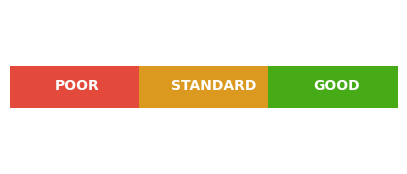

In [17]:
col1, col2 = st.columns([3, 2])

with col2:
    x1 = [0, 6, 0]
    x2 = [0, 4, 0]
    x3 = [0, 2, 0]
    y = ['0', '1', '2']

    f, ax = plt.subplots(figsize=(5,2))

    p1 = sns.barplot(x=x1, y=y, color='#3EC300')
    p1.set(xticklabels=[], yticklabels=[])
    p1.tick_params(bottom=False, left=False)
    p2 = sns.barplot(x=x2, y=y, color='#FAA300')
    p2.set(xticklabels=[], yticklabels=[])
    p2.tick_params(bottom=False, left=False)
    p3 = sns.barplot(x=x3, y=y, color='#FF331F')
    p3.set(xticklabels=[], yticklabels=[])
    p3.tick_params(bottom=False, left=False)

    plt.text(0.7, 1.05, "POOR", horizontalalignment='left', size='medium', color='white', weight='semibold')
    plt.text(2.5, 1.05, "STANDARD", horizontalalignment='left', size='medium', color='white', weight='semibold')
    plt.text(4.7, 1.05, "GOOD", horizontalalignment='left', size='medium', color='white', weight='semibold')

    ax.set(xlim=(0, 6))
    sns.despine(left=True, bottom=True)
    figure = st.pyplot(f)

with col1:

    placeholder = st.empty()

    if run:
        resp = {
            'age': age,
            'annual_income': annual_income,
            'monthly_inhand_salary': monthly_inhand_salary,
            'accounts': accounts,
            'credit_cards': credit_cards,
            'interest_rate': interest_rate,
            'noof_loans': noof_loans,
            'delay_from_due_date': delay_from_due_date,
            'delayed_payments': delayed_payments,
            'changed_credit_limit': changed_credit_limit,
            'num_credit_inquiries': num_credit_inquiries,
            'credit_mix': credit_mix,
            'outstanding_debt': outstanding_debt,
            'credit_card_ratio': credit_card_ratio,
            'credit_history': credit_history,
            'emi_monthly': emi_monthly,
            'amount_invested_monthly': amount_invested_monthly,
            'monthly_balance': monthly_balance,
            'loans': loans,
            'occupation': occupation,
            'minimum_payment': minimum_payment
               }
        output = transform_resp(resp)
        output = pd.DataFrame(output, index=[0])
        output.loc[:,:] = scaler.transform(output)
        preds = model.predict(output)
        prediction = str(preds.argmax(axis=1))
        credit_score = prediction[1]
        if credit_score == 2:
            st.balloons()
            t1 = plt.Polygon([[5, 0.5], [5.5, 0], [4.5, 0]], color='black')
            placeholder.markdown('Your credit score is **GOOD**! Congratulations!')
            st.markdown('This credit score indicates that this person is likely to repay a loan, so the risk of giving them credit is low.')
        elif credit_score == 1:
            t1 = plt.Polygon([[3, 0.5], [3.5, 0], [2.5, 0]], color='black')
            placeholder.markdown('Your credit score is **STANDARD**.')
            st.markdown('This credit score indicates that this person is likely to repay a loan, but can occasionally miss some payments. Meaning that the risk of giving them credit is medium.')
        elif credit_score == 0:
            t1 = plt.Polygon([[1, 0.5], [1.5, 0], [0.5, 0]], color='black')
            placeholder.markdown('Your credit score is **POOR**.')
            st.markdown('This credit score indicates that this person is unlikely to repay a loan, so the risk of lending them credit is high.')
        plt.gca().add_patch(t1)
        figure.pyplot(f)
        prob_fig, ax = plt.subplots()

